In [1]:
'''
【课程3.4.2】 PCA主成分分析
'''

'\n【课程3.4.2】 PCA主成分分析\n'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 构建数据
rng = np.random.RandomState(8)
data = np.dot(rng.rand(2,2),rng.randn(2,200)).T
df = pd.DataFrame(data,columns=['X1','X2'])
df.head()

#绘制散点图
plt.scatter(df['X1'],df['X2'],alpha=0.8,marker='.')
plt.axis('equal')
plt.grid()

,X1,X2
0,-1.174787,-1.404131
1,-1.374449,-1.294660
2,-2.316007,-2.166109
3,0.947847,1.460480
4,1.762375,1.640622


[0.97893552]
[[-0.7788006  -0.62727158]]
1
original shape (200, 2)
transfrom shape (200, 1)


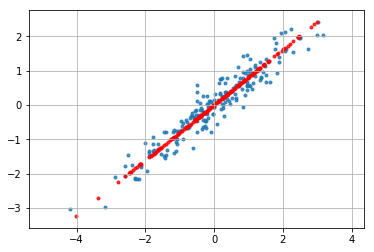

In [15]:
# 二维数据降维
from sklearn.decomposition import PCA

pca = PCA(n_components =1) # 降到一维
pca.fit(df)# 构建模型
#sklearn.decomposition.PCA(n_components=None,copy=True,whiten=False)
# n_components: PCA算法中所要保留的主成分的个数n ，也就是要保留特征个数。
# copy：默认为True ，表示在运行算法时 是否将原始训练数据复制一份。
# fit(X,y=None) 表示用X对pca这个对象进行训练

print(pca.explained_variance_ratio_) # 返回 所保留的N个成本各自的方差百分比
print(pca.components_) # 返回具有最大方差的成分
print(pca.n_components_) # 返回所保留的成分个数
# 降维后的主成分 A1 = -0.77 *X1 + -0.62 *X2

x_pca = pca.transform(df) # 数据转换
x_new = pca.inverse_transform(x_pca) # 将降维后的数据转换成 原始数据
print('original shape',df.shape) # 转换前的数据维度
print('transfrom shape',x_pca.shape) 
# 主成分分析，生成新的向量x_pca
# fit_transform(X): 用X来训练PCA模型，同时返回降维后的数据，这里x_pca就是降维后的数据
# inverse_transform() : 将降维后的数据转换为原始数据

plt.scatter(df['X1'],df['X2'],alpha=0.8,marker='.')
plt.scatter(x_new[:,0],x_new[:,1],alpha=0.8,color='r',marker='.')
plt.axis('equal')
plt.grid()

In [16]:
# 多维数据降维
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.keys())
print(len(digits['data']))
print(digits.data.shape)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
1797
(1797, 64)


[179.0069301  163.71774688]


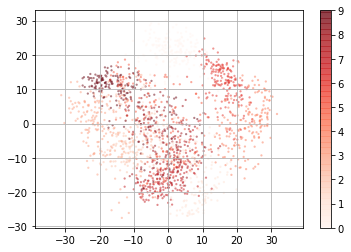

In [20]:
pca = PCA(n_components=2)
projected = pca.fit_transform(digits.data)

print(pca.explained_variance_)

# 绘图
plt.scatter(projected[:,0],projected[:,1],c=digits.target,edgecolors='none',alpha=0.5,cmap='Reds',s=5)
plt.axis('equal')
plt.grid()
plt.colorbar()  # 添加一个颜色的柱状标尺

[179.0069301  163.71774686 141.78843909 101.10037485  69.51316312
  59.10849775  51.88449719  44.0147442   40.31090464  37.01173623]
[0.14890594 0.13618771 0.11794594 0.08409979 0.05782414 0.04916908
 0.04315984 0.03661342 0.03353241 0.03078801]


Text(6,0.783275,'第七个成分累计值贡献率超过85%')

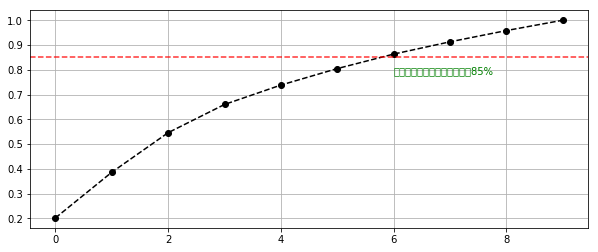

In [24]:
# 下面对10个特征点进行 排列 求出 成分累积贡献率超过85% 是哪个点？
pca = PCA(n_components=10)
pro = pca.fit_transform(digits.data)

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

s = pca.explained_variance_
c_s = pd.DataFrame({'b':s,
                 'b_sum':s.cumsum()/s.sum()})
# 绘图
c_s['b_sum'].plot(style = '--ko',figsize=(10,4))
plt.axhline(0.85,hold=None,color='r',linestyle='--',alpha=0.8)
plt.grid()
plt.text(6,c_s['b_sum'].iloc[6]-0.08,'第七个成分累计值贡献率超过85%',color='g')